In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

In [2]:
tech_list = ['ABZPF']
end = datetime.now()
start = datetime(end.year -2, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
company_list = [ABZPF]
company_name = ["Aboitiz Power Corporation"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-27 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-09-28 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-09-29 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-09-30 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-10-03 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-10-04 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-10-05 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-10-06 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation
2022-10-07 00:00:00-04:00,0.5168,0.5168,0.5168,0.5168,0.5168,0,Aboitiz Power Corporation


In [4]:
ABZPF.describe()

,Open,High,Low,Close,Adj Close,Volume
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.569136,0.569186,0.569132,0.569182,-0.068794,102.021869
std,0.079173,0.079213,0.079168,0.079208,0.570891,907.247789
min,0.428800,0.428800,0.428800,0.428800,-0.765400,0.000000
25%,0.516800,0.516800,0.516800,0.516800,-0.603734,0.000000
50%,0.562500,0.562500,0.562500,0.562500,-0.480751,0.000000
75%,0.650000,0.650000,0.650000,0.650000,0.516800,0.000000
max,0.684600,0.684600,0.684600,0.684600,0.684600,13412.000000


In [5]:
ABZPF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2020-10-12 00:00:00-04:00 to 2022-10-10 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          503 non-null    float64
 1   High          503 non-null    float64
 2   Low           503 non-null    float64
 3   Close         503 non-null    float64
 4   Adj Close     503 non-null    float64
 5   Volume        503 non-null    int64  
 6   company_name  503 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.4+ KB


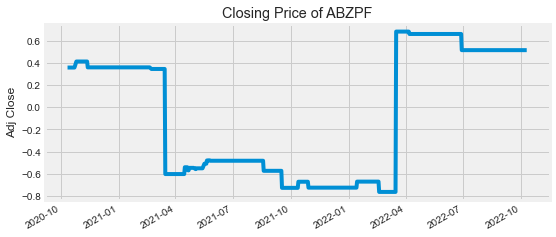

In [6]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")    
plt.tight_layout()

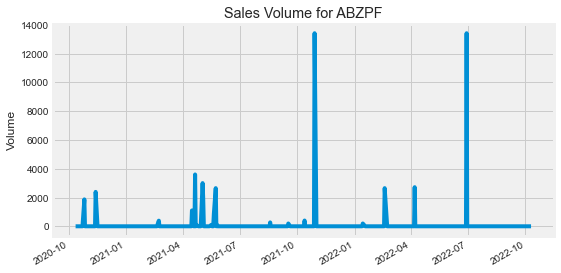

In [7]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")    
plt.tight_layout()

In [8]:
# Moving Average
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'ABZPF')

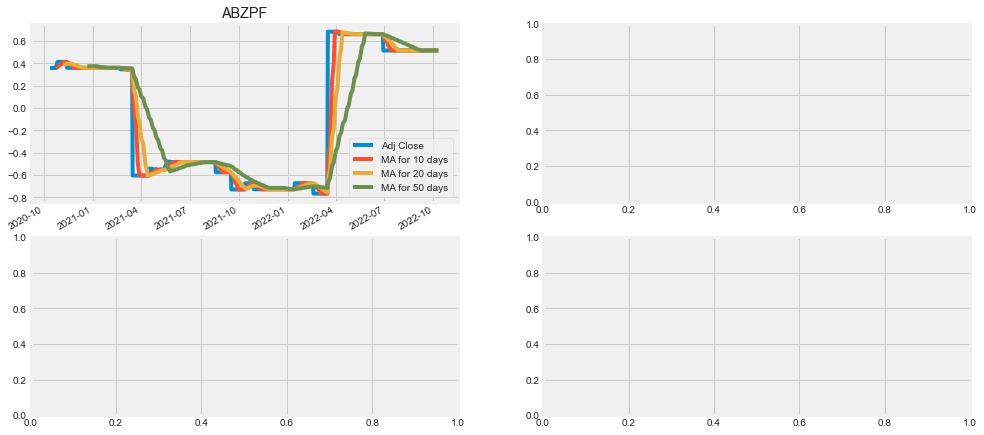

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
ABZPF[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ABZPF')

Text(0.5, 1.0, 'ABZPF')

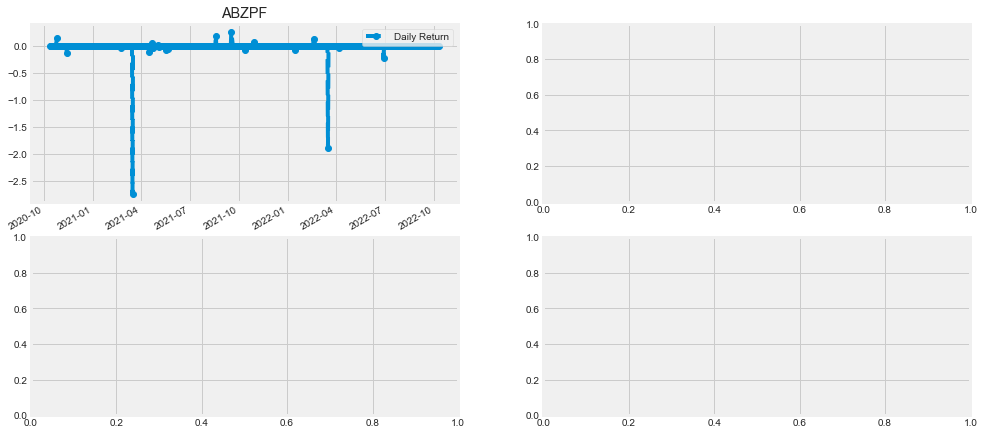

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()    
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
ABZPF['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ABZPF')

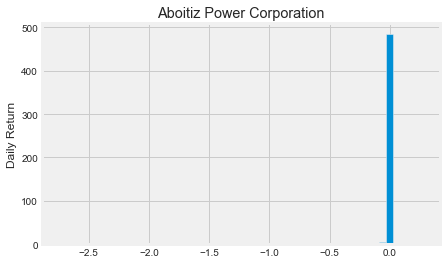

In [11]:
plt.figure(figsize=(12, 7))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')    
plt.tight_layout()

In [12]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head()

Symbols,ABZPF
Date,
2020-10-12,0.359424
2020-10-13,0.359424
2020-10-14,0.359424
2020-10-15,0.359424
2020-10-16,0.359424


In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,ABZPF
Date,
2020-10-12,NaN
2020-10-13,0.0
2020-10-14,0.0
2020-10-15,0.0
2020-10-16,0.0


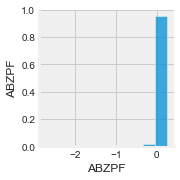

In [14]:
sns.pairplot(tech_rets, kind='reg')

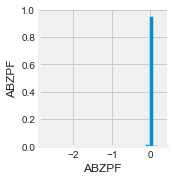

In [15]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

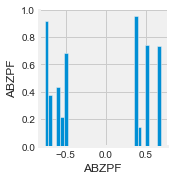

In [16]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

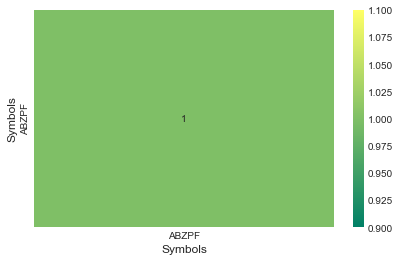

In [17]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

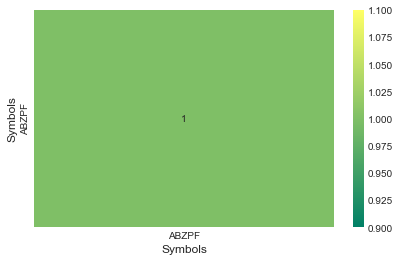

In [18]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

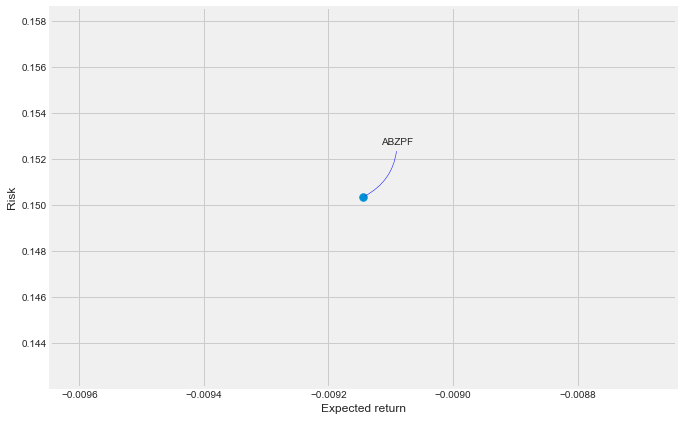

In [19]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [20]:
df = DataReader('ABZPF', data_source='yahoo', start='2020-10-12', end=datetime.now())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-12,0.5600,0.5600,0.5600,0.5600,0.0,0.359424
2020-10-13,0.5600,0.5600,0.5600,0.5600,0.0,0.359424
2020-10-14,0.5600,0.5600,0.5600,0.5600,0.0,0.359424
2020-10-15,0.5600,0.5600,0.5600,0.5600,0.0,0.359424
2020-10-16,0.5600,0.5600,0.5600,0.5600,0.0,0.359424
...,...,...,...,...,...,...
2022-10-04,0.5168,0.5168,0.5168,0.5168,0.0,0.516800
2022-10-05,0.5168,0.5168,0.5168,0.5168,0.0,0.516800
2022-10-06,0.5168,0.5168,0.5168,0.5168,0.0,0.516800


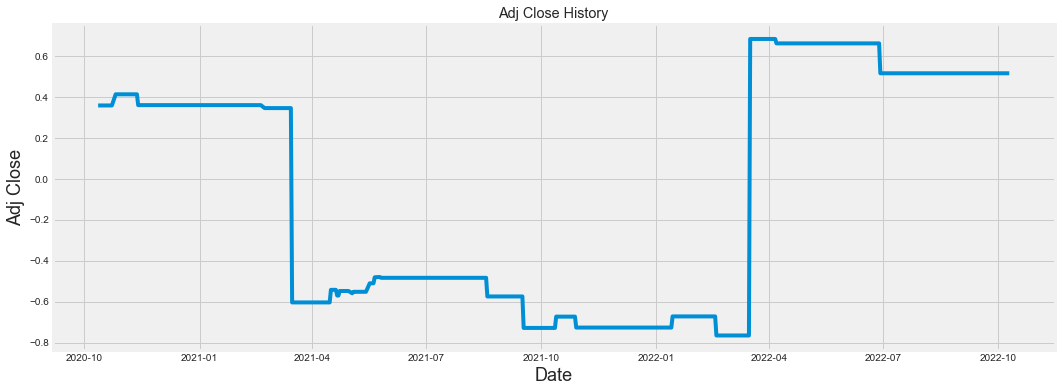

In [21]:
plt.figure(figsize=(16,6))
plt.title('Adj Close History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close', fontsize=18)
plt.show()

In [22]:
data = df.filter(['Adj Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

478

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.77574099],
       [0.77574099],
       [0.77574099],
       [0.77574099],
       [0.77574099],
       [0.77574099],
       [0.77574099],
       [0.77574099],
       [0.77574099],
       [0.77574099],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.81336546],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.77684758],
       [0.776

In [24]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.77574099, 0.77574099, 0.77574099, 0.77574099, 0.77574099,
       0.77574099, 0.77574099, 0.77574099, 0.77574099, 0.77574099,
       0.81336546, 0.81336546, 0.81336546, 0.81336546, 0.81336546,
       0.81336546, 0.81336546, 0.81336546, 0.81336546, 0.81336546,
       0.81336546, 0.81336546, 0.81336546, 0.81336546, 0.77684758,
       0.77684758, 0.77684758, 0.77684758, 0.77684758, 0.77684758,
       0.77684758, 0.77684758, 0.77684758, 0.77684758, 0.77684758,
       0.77684758, 0.77684758, 0.77684758, 0.77684758, 0.77684758,
       0.77684758, 0.77684758, 0.77684758, 0.77684758, 0.77684758,
       0.77684758, 0.77684758, 0.77684758, 0.77684758, 0.77684758,
       0.77684758, 0.77684758, 0.77684758, 0.77684758, 0.77684758,
       0.77684758, 0.77684758, 0.77684758, 0.77684758, 0.77684758])]
[0.7768475845630558]

[array([0.77574099, 0.77574099, 0.77574099, 0.77574099, 0.77574099,
       0.77574099, 0.77574099, 0.77574099, 0.77574099, 0.77574099,
       0.81336546, 0.81336546, 0.813

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

418/418 [==============================] - 11s 19ms/step - loss: 0.0183


In [26]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


0.03018517971077668

C:\Users\Joanne\AppData\Local\Temp\ipykernel_1524\3615446826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


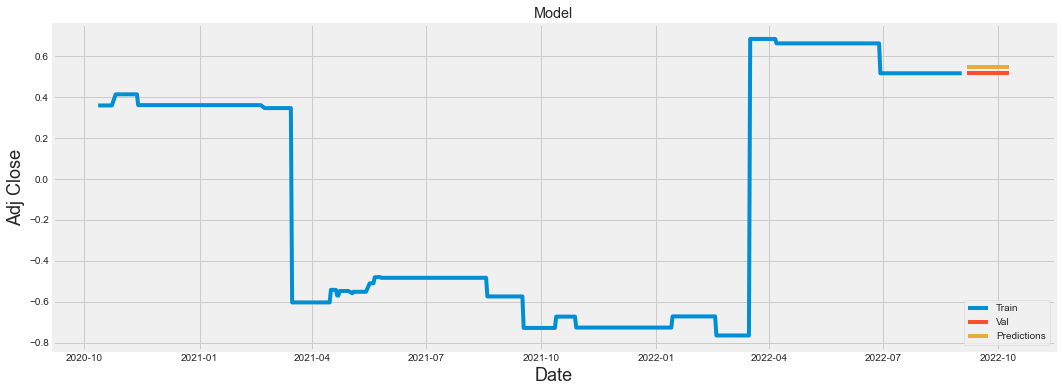

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
valid

,Adj Close,Predictions
Date,,
2022-09-06,0.5168,0.546985
2022-09-07,0.5168,0.546985
2022-09-08,0.5168,0.546985
2022-09-09,0.5168,0.546985
2022-09-12,0.5168,0.546985
2022-09-13,0.5168,0.546985
2022-09-14,0.5168,0.546985
2022-09-15,0.5168,0.546985
2022-09-16,0.5168,0.546985
